## 05-01 Learning Rate Scheduler

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [12]:
weight = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

In [13]:
def plot_learning_rate(scheduler, max_epoch=200, iteration=10, plot_label='LR Scheduler'):
    lr_list = list()
    for epoch in range(max_epoch):
        lr_list.append(scheduler.get_lr())
        for i in range(iteration):
            loss = torch.pow((weight - target), 2)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        scheduler.step()
    
    plt.plot(list(range(max_epoch)), lr_list, label=plot_label)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()

### 1.StepLR

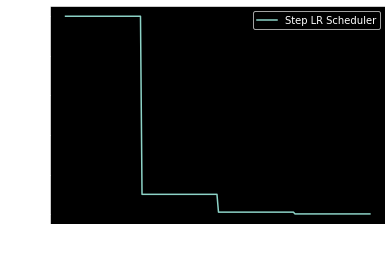

In [15]:
optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
plot_learning_rate(
    scheduler,
    plot_label='Step LR Scheduler'
)

### 2.MultiStepLR

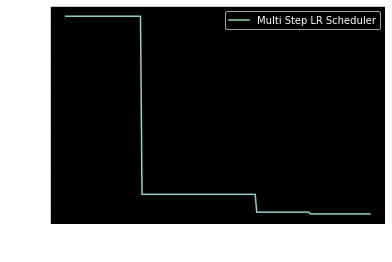

In [16]:
optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 125, 160], gamma=0.1)
plot_learning_rate(
    scheduler,
    plot_label='Multi Step LR Scheduler'
)

### 3.ExponentialLR

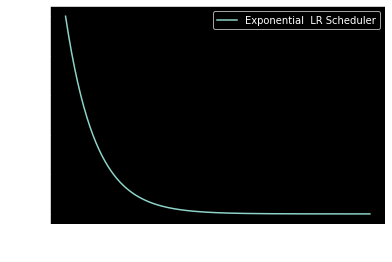

In [17]:
optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer,  gamma=0.95)
plot_learning_rate(
    scheduler,
    plot_label='Exponential  LR Scheduler'
)

### 4.CosineAnnealingLR

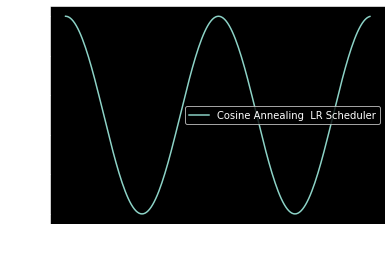

In [18]:
optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer,  T_max=50, eta_min=0.)
plot_learning_rate(
    scheduler,
    plot_label='Cosine Annealing  LR Scheduler'
)

### 5.ReduceLROnPlateau

In [20]:
optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    factor=0.1,
    mode='min',
    patience=10,
    cooldown=10,
    min_lr=1e-4,
    verbose=True
)

loss = 0.5
for epoch in range(200):
    for i in range(10):
        optimizer.step()
        optimizer.zero_grad()
    if epoch == 5:
        loss = 0.4
    scheduler.step(loss)

Epoch    16: reducing learning rate of group 0 to 1.0000e-02.
Epoch    37: reducing learning rate of group 0 to 1.0000e-03.
Epoch    58: reducing learning rate of group 0 to 1.0000e-04.


### 6.LambdaLR

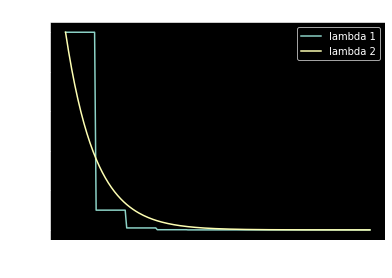

In [21]:
init_lr = 0.1
w1 = torch.randn((6, 3, 5, 5))
w2 = torch.ones((5, 5))

optimizer = optim.SGD([
    {'params': [w1]},
    {'params': [w2]}
], lr = init_lr)
lambda1 = lambda epoch: 0.1 ** (epoch // 20)
lambda2 = lambda epoch: 0.95 ** epoch
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda1, lambda2])

lr_list = list()
for epoch in range(200):
    lr_list.append(scheduler.get_lr())
    for i in range(10):
        optimizer.step()
        optimizer.zero_grad()
    scheduler.step()

plt.plot(list(range(200)), [i[0] for i in lr_list], label="lambda 1")
plt.plot(list(range(200)), [i[1] for i in lr_list], label="lambda 2")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("LambdaLR")
plt.legend()
plt.show()